In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm1
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u
plt.style.use(['science','notebook','grid'])
PAN=pd.read_csv("Pantheon+SH0ES.csv",sep=" ")
covmatcomponents = [ "Pantheon+SH0ES_122221_BS21", "Pantheon+SH0ES_122221_C11", "Pantheon+SH0ES_122221_CALIB", "Pantheon+SH0ES_122221_CSP_RECAL", "Pantheon+SH0ES_122221_G10", "Pantheon+SH0ES_122221_HSTCALSPEC"
                   ,"Pantheon+SH0ES_122221_JLA_SALT2","Pantheon+SH0ES_122221_MASSSTEP","Pantheon+SH0ES_122221_MWCOLORLAW","Pantheon+SH0ES_122221_MWEBV","Pantheon+SH0ES_122221_SCATTERMOD","Pantheon+SH0ES_122221_SPECEFF",
                   "Pantheon+SH0ES_122221_VPEC","Pantheon+SH0ES_122221_ZSHIFT"]

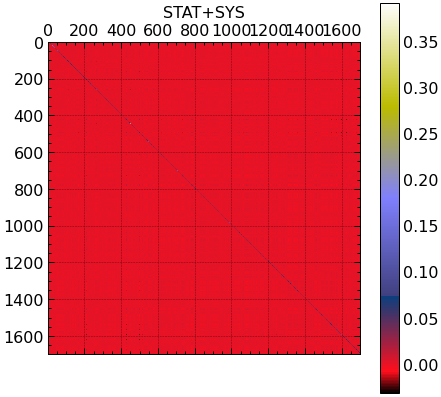

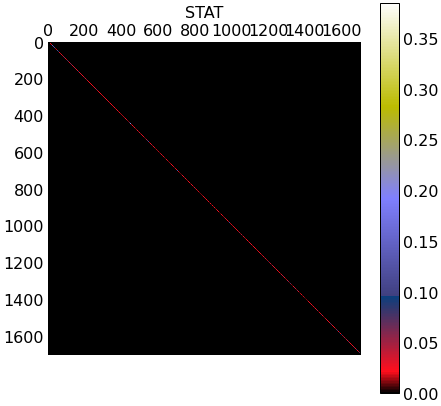

Now plotting the systematic groupings


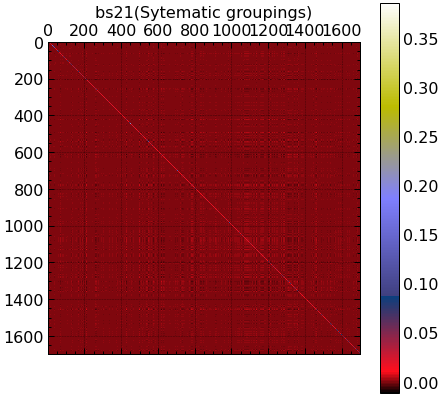

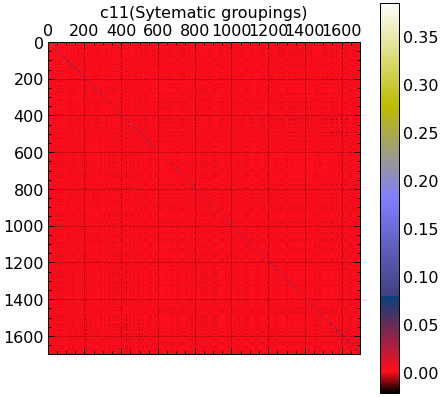

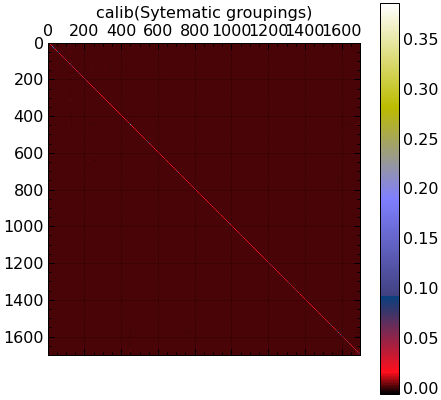

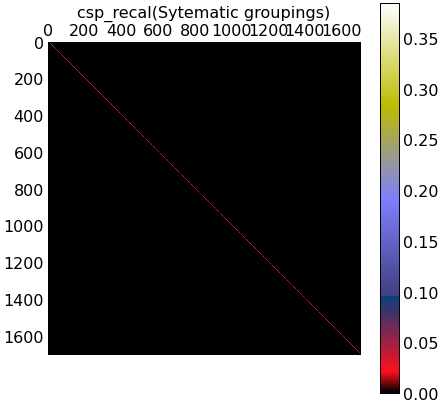

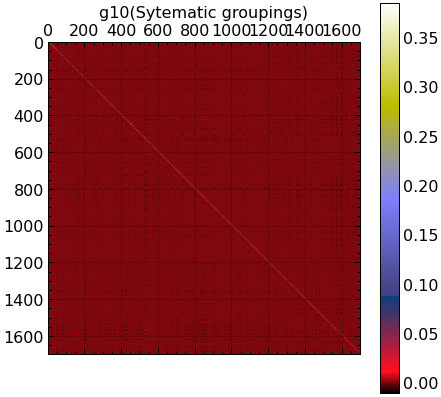

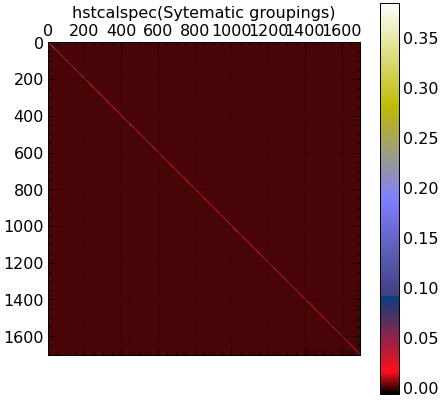

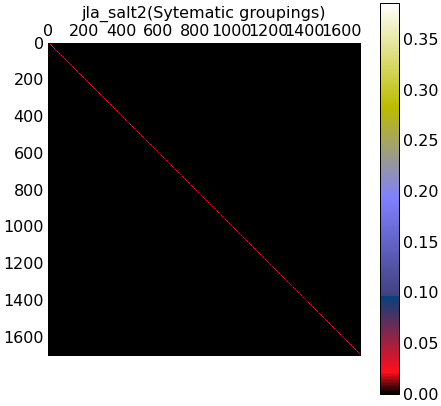

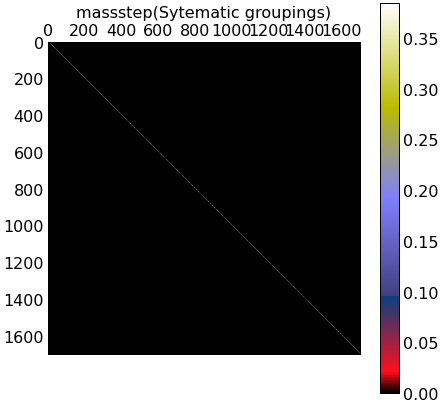

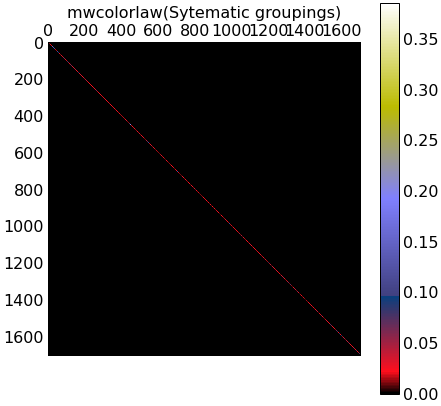

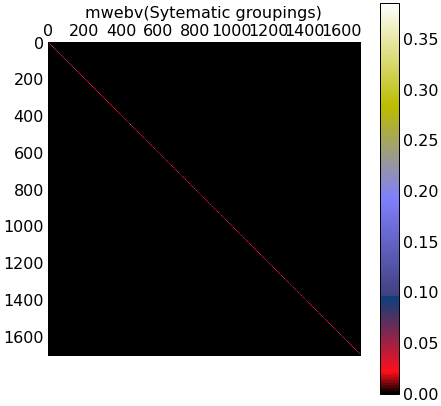

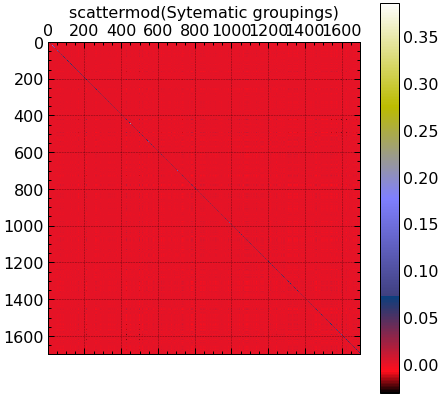

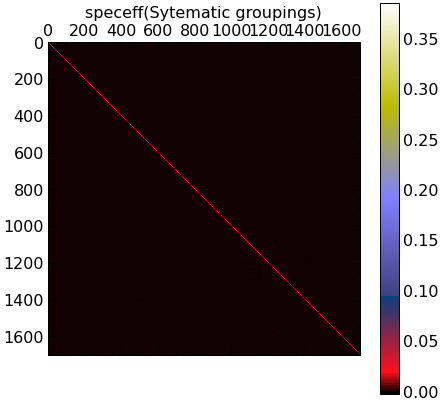

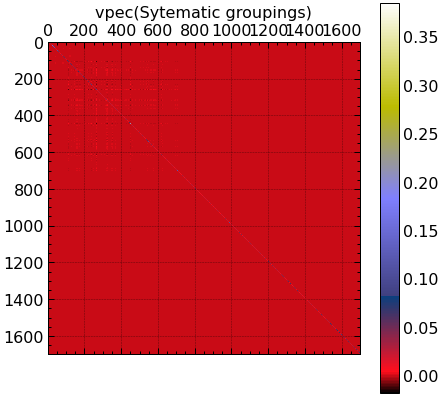

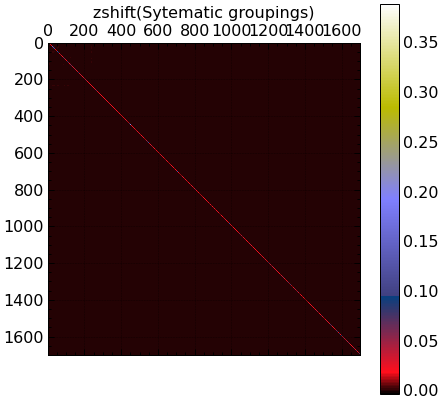

In [2]:

statsys=pd.read_csv('Pantheon+SH0ES_STAT+SYS.cov')
statsys=statsys['1701']
statsys=np.array(statsys)
statsys=statsys.reshape((1701,1701))

plt.figure(figsize=(7,7))
plt.matshow(statsys,cmap=cm1.gist_stern,fignum=1)
plt.title('STAT+SYS')
plt.colorbar()

plt.show()
plt.figure(figsize=(7,7))
stat=pd.read_csv('Pantheon+SH0ES_STATONLY.cov')
stat=stat['1701']
stat=np.array(stat)
stat=stat.reshape((1701,1701))

plt.matshow(stat,cmap=cm1.gist_stern,fignum=1)
plt.title('STAT')
plt.colorbar()
plt.show()
dct={}
i=3

print("Now plotting the systematic groupings")
for ol in covmatcomponents:
    plt.figure(figsize=(7,7))
    imd=ol.replace('Pantheon+SH0ES_122221_','')
    imd=imd.lower()
    mat=pd.read_csv('sytematic_groupings/'+ol+'.cov')
    lst=np.array(mat['1701'])
    newmat=np.reshape(lst,(1701,1701))
    dct[imd]=newmat
    plt.matshow(dct[imd],cmap=cm1.gist_stern,fignum=1)
    plt.title(imd +str('(Sytematic groupings)'))
    plt.colorbar()
    i+=1
    plt.show()

    
    

### Notice above the colorbar of all the the covariance matrices,  how all are of same order. 
Further adding all the systematic groupings

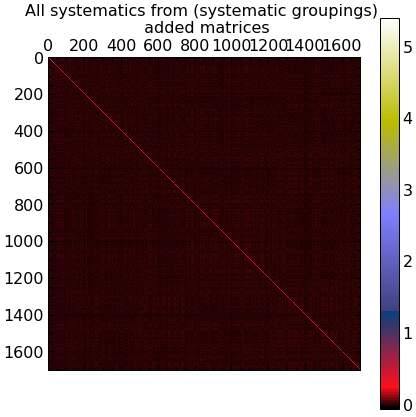

In [3]:
#now adding all the covariance matrices as done for JLA analyis 
s=0
for ol in covmatcomponents:

    imd=ol.replace('Pantheon+SH0ES_122221_','')
    imd=imd.lower()
    s+=dct[imd]
  
plt.figure(figsize=(7,7))
plt.matshow(s,cmap=cm1.gist_stern,fignum=1)
plt.title('All systematics from (systematic groupings) \n added matrices')
plt.colorbar()

## Compare it with the only systematic matrix

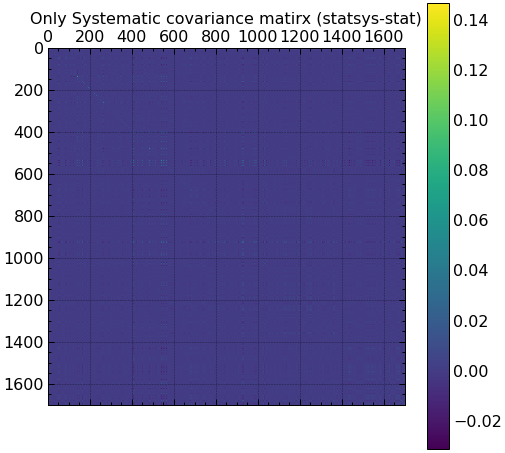

In [4]:
plt.figure(figsize=(8,8))
plt.matshow(statsys-stat,fignum=1)
plt.title("Only Systematic covariance matirx (statsys-stat)")
plt.colorbar()

### Subtracting stat matrix from all the systematic groupings

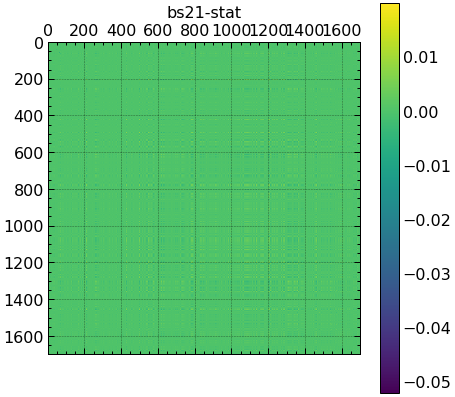

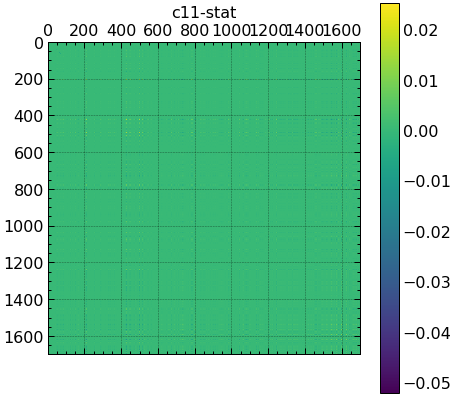

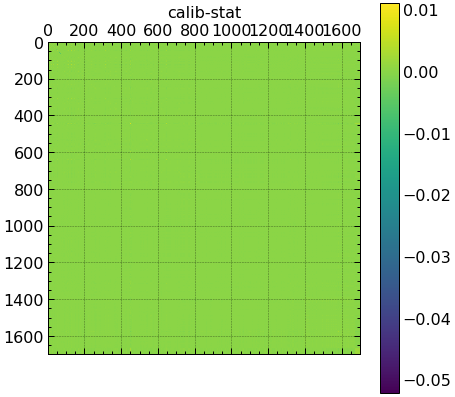

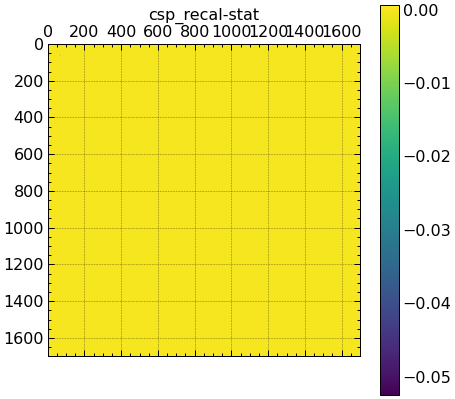

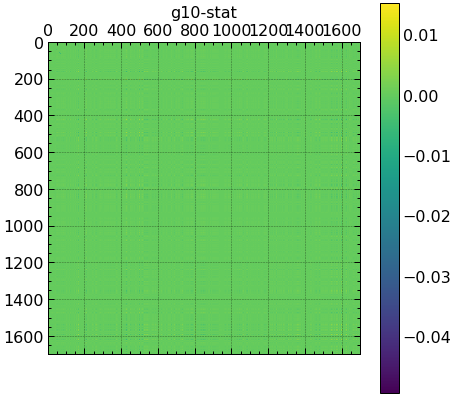

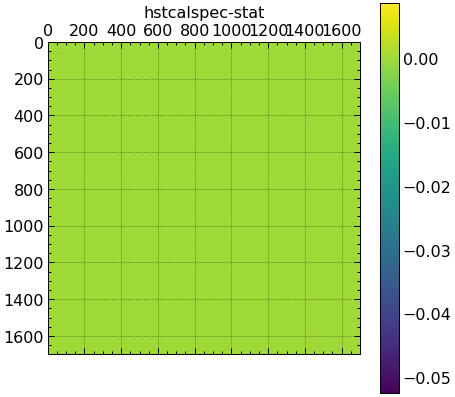

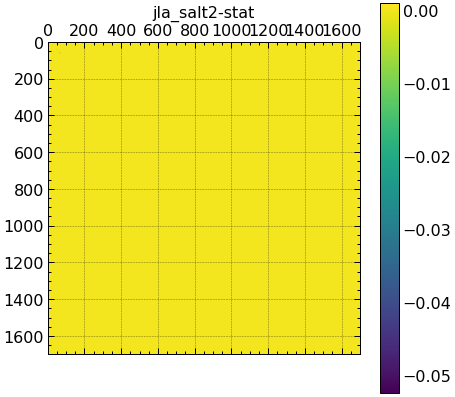

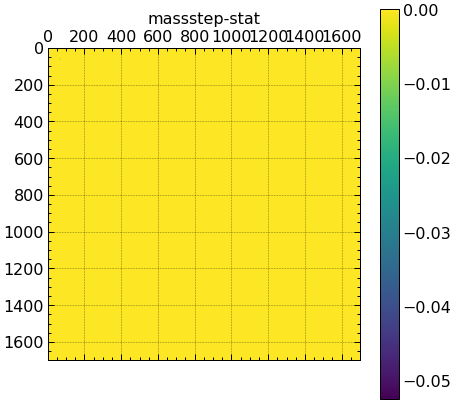

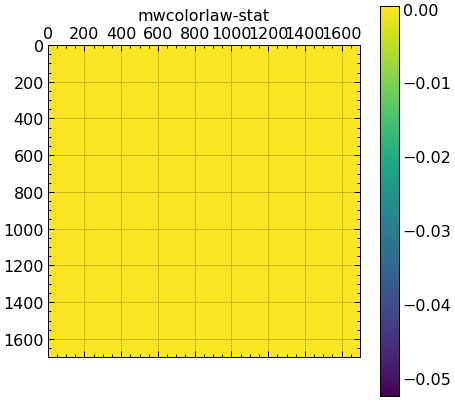

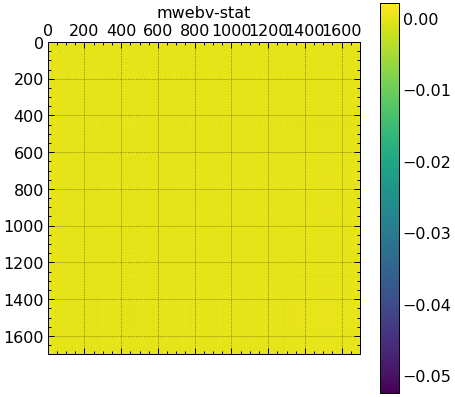

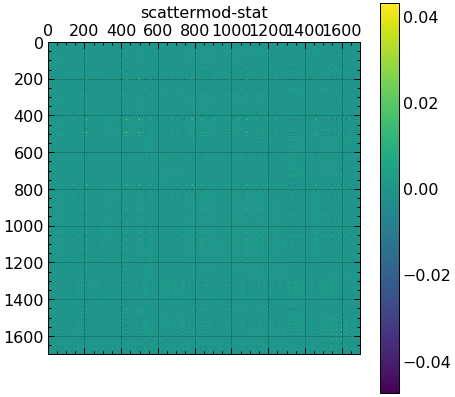

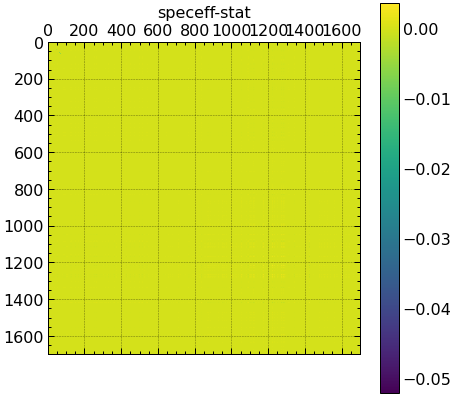

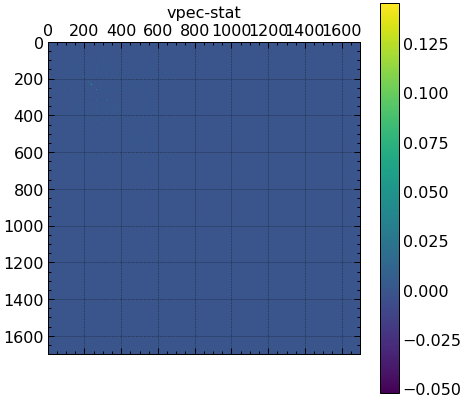

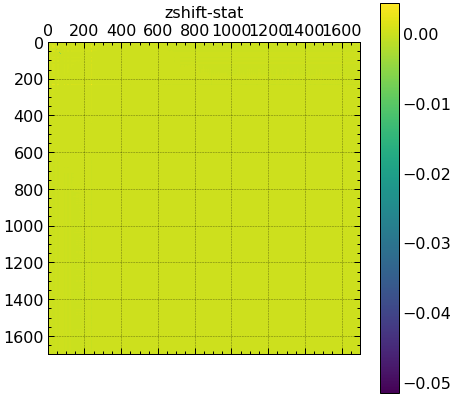

In [5]:
newdct={}
for ol in covmatcomponents:
    plt.figure(figsize=(7,7))
    imd=ol.replace('Pantheon+SH0ES_122221_','')
    imd=imd.lower()
    newdct[imd]=dct[imd]-stat
    plt.matshow(newdct[imd],fignum=1)
    plt.title(imd+"-stat")
    plt.colorbar()
    plt.show()
    

### Just in case......also subtracting all the covmat from statsys matrix

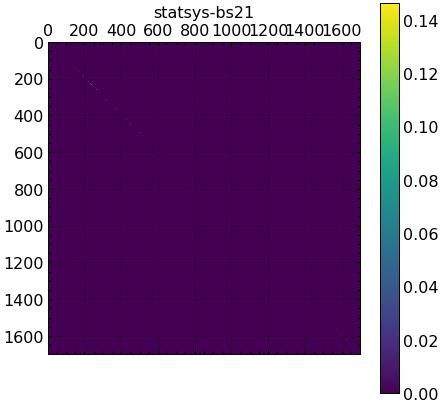

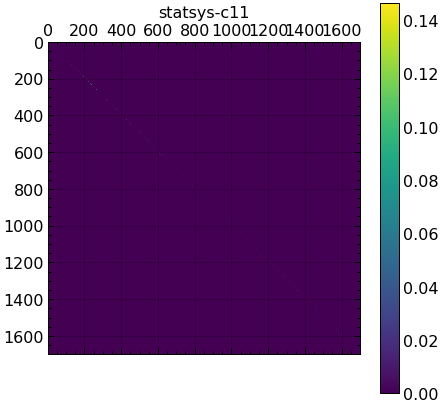

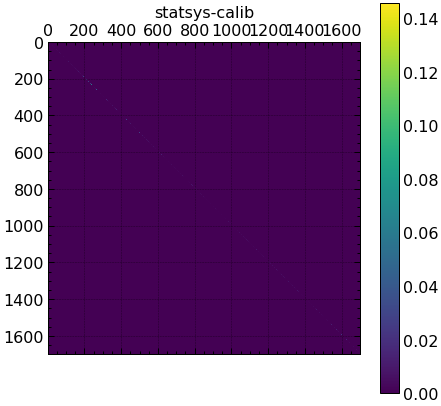

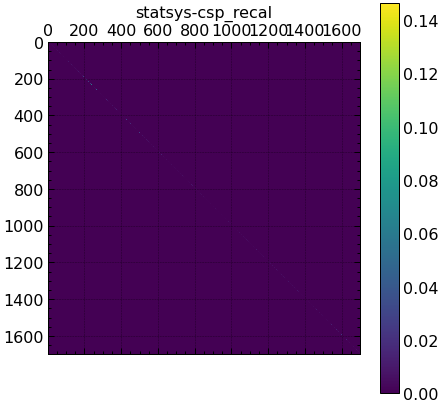

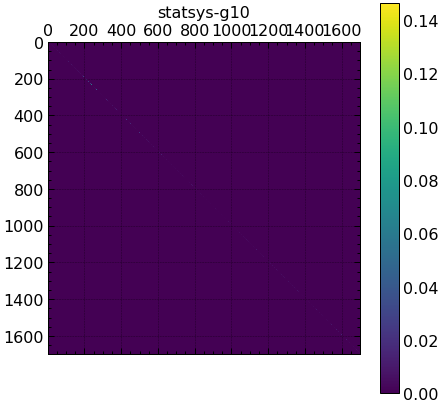

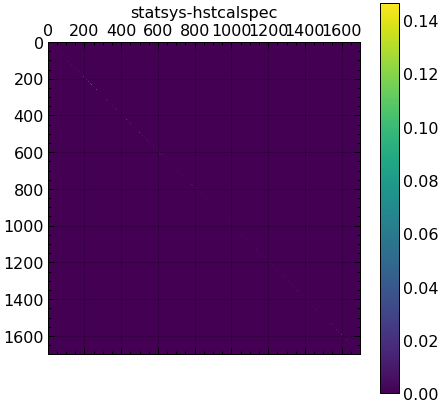

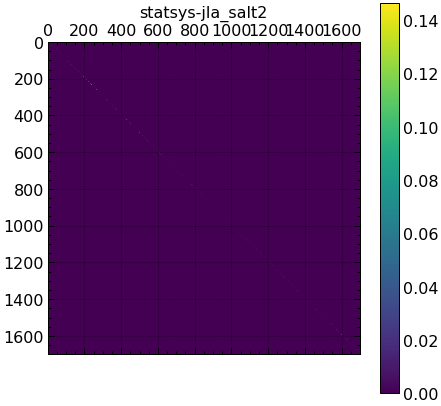

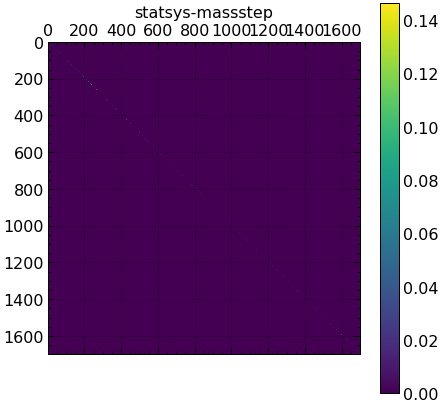

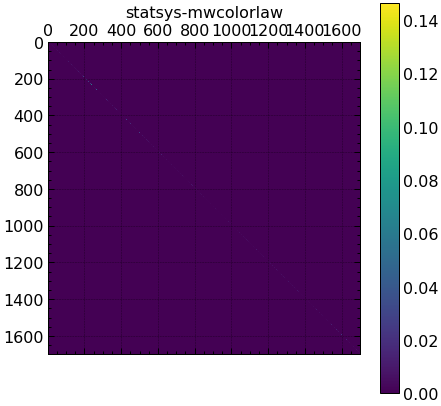

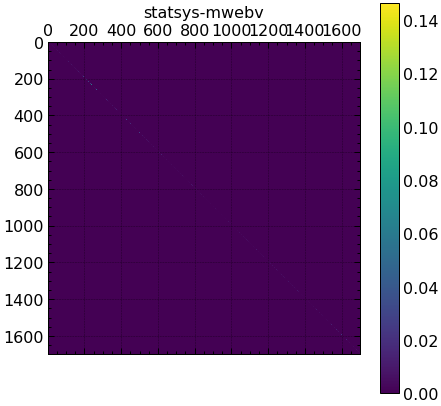

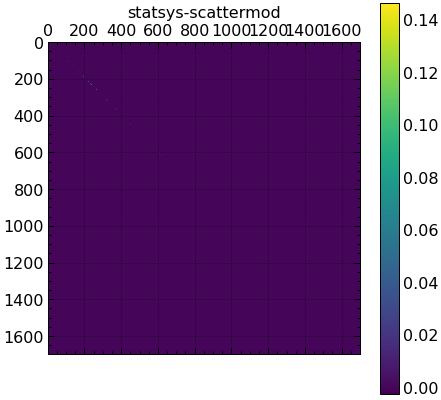

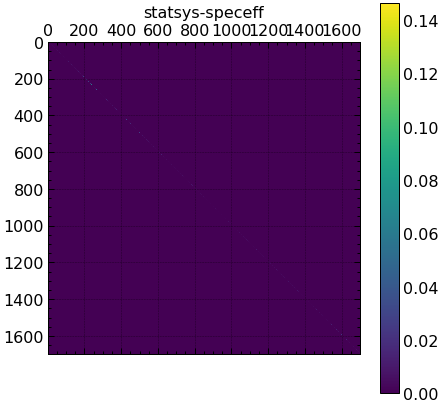

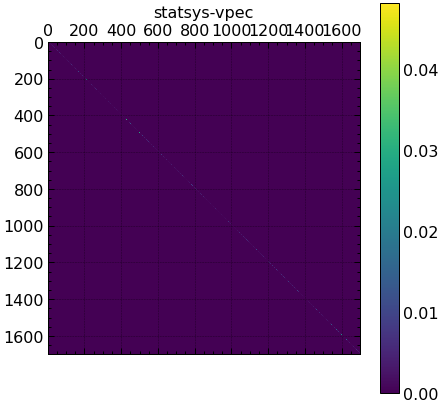

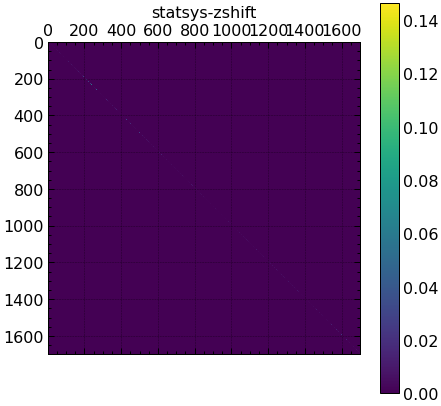

In [63]:
newdct2={}
for ol in covmatcomponents:
    plt.figure(figsize=(7,7))
    imd=ol.replace('Pantheon+SH0ES_122221_','')
    imd=imd.lower()
    newdct2[imd]=statsys-dct[imd]
    plt.matshow(np.diag((np.diag(newdct2[imd]))),fignum=1)
    plt.title("statsys-"+imd)
    plt.colorbar()
    plt.show()

In [62]:
#np.save('../COV_vpec/temp',newdct['vpec'])
